
# Investigate a Dataset: No Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data used for this analysis contains information related to people who make a doctors appointment in Brazil. The dataset has 110,527 medical appointments and 14 associated characteristics about the patient included in each row. The main focus of the dataset is on answering the question of whether or not patients show up for their appointment.

The original source of the dataset is on [Kaggle](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&source=editors&ust=1668802565688630&usg=AOvVaw3n0AgzZvNZ4RZ0ZTc6iRFr) and the data dictionary with the description of the columns can be found [here](https://docs.google.com/document/d/15_ItLg2FxbLnSPKrf72FcLdw-dMsQqNxaabxcJCe4SE/edit?usp=sharing) 


<a id='questions'></a>
## Questions.

> <li><a href="#do">Do women take more care of their health when compared to men?</a></li>
> <li><a href="#how">How does hypertension affect the chances of a patient showing up for their appointments?</a></li>
> <li><a href="#is">Is age a factor that causes patients to show up more for their appointments?</a></li>
> <li><a href="#what">What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</a></li>
</ul>

### Import Modules for Analysis

In [1]:
#set up import statements for all of the packages that I plan to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 


### General Properties

In [3]:
#load dataset and print out a few lines. 
df = pd.read_csv('no_show_appointments_data.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


#### Assessing Data

Perform operations to inspect data types and look for instances of missing or possibly errant data.

In [4]:
#number of samples in the dataset and number of columns in dataset
df.shape

(110527, 14)

In [5]:
#statistical information of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#all data in rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#checking for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#confirm that there are no missing values in dataset
df.isna()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# checking data types of columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [10]:
#checking for duplicate rows in dataset
sum(df.duplicated())

0

In [11]:
# unique values for Scholarship
df.Scholarship.unique()

array([0, 1], dtype=int64)

In [12]:
# unique values for Gender
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [13]:
# unique values for Age
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [15]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [16]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [17]:
#check the number of duplicated patient ids
df.PatientId.duplicated().sum()

48228

#### Data Observations
- There is no  missing data in the dataset
- The No-show column needs to be renamed to replace the hyphen and all column labels need to be changed to lowercase to allow for ease and consistency.
- hipertension and handcap column have to be renamed to hypertension and handicap respectively.
- Encoding of the No-show column says ‘No’ if the patient showed up to their appointment and ‘Yes’ if they did not show up, it will be changed to say 'Yes' if the patient showed up to their appointment, and 'No' if they did not show up.
- The age sample, -1 is not a valid age, and without anyway to clarify age of patient, has to be dropped.
- scheduledday and appointmentdate are both in string type, so I'll convert those columns into datetime datatype.
- Some data have their scheduledday being later than the appointmentday, which would be invalid because scheduledday has to be before appointment day. All affected pairs will be dropped. 
- Feature engineering needs to be done on appointmentday, which will first be renamed to appointmentdate. This is so that month and day features can be extracted from the column. new appointmentmonth and appointmentday columns will need datatype change from object to int.
- There are duplicated patientids which expectedly reveal that some patients have more than 1 appointment, these will be dropped as they may affect accuracy of results.  
- Certain variables in dataset will have to be removed because of irrelevance in exploring the questions of interest.
- Convert columns into right datatypes.

### Data Cleaning

#### Renaming and Fixing Column Names

In [18]:
# Replacing the hyphen in no-show to an underscore and converting all column labels to lowercase 
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [19]:
# Renaming no_show column to showed_up for ease 
df.rename(columns={'no_show':'show_up'}, inplace=True)

In [20]:
# Renaming hipertension to hypertension
df.rename(columns={'hipertension' : 'hypertension'}, inplace=True)

In [21]:
# Renaming handcap to handicap
df.rename(columns={'handcap' : 'handicap'}, inplace=True)

In [22]:
# renaming appointmentday to appointmentdate
df.rename(columns={'appointmentday' : 'appointmentdate'}, inplace=True)

In [23]:
# confirming changes
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentdate', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show_up'],
      dtype='object')

#### Fixing Column Values

Encoding of the No-show column says ‘No’ if the patient showed up to their appointment and ‘Yes’ if they did not show up, I'll change that to 'Yes' if the patient showed up to their appointment, and 'No' if they did not show up. I believe this new showed_up column is more intuitive.

In [25]:
# replacing No with Yes, and Yes with No in the no_show column
df['show_up'] = df['show_up'].replace(['No','Yes'],['Yes','No'])

The age sample, -1 is not a valid age, and without anyway to clarify age of patient, has to be dropped.

In [26]:
# confirming that only one row has a negative age sample
print(f'Number of rows with negative valued age: {sum(df.age < 0)}')

Number of rows with negative valued age: 1


After confirming that there is only one row that has negative age, I'll proceed to drop this row.

In [27]:
# dropping -1 sample in the age column
df.drop(df[df["age"]==-1].index, inplace=True)

the samples in the dataset should be 110,526 after the row has been dropped.

In [28]:
# confirming change using shape. 
df.shape

(110526, 14)

Changing datatype for scheduledday and appointmentdate

In [29]:
df.scheduledday = pd.to_datetime(df.scheduledday, infer_datetime_format=True)
df.appointmentdate = pd.to_datetime(df.appointmentdate, infer_datetime_format=True)

In [30]:
# confirminig change
df.dtypes

patientid                 float64
appointmentid               int64
gender                     object
scheduledday       datetime64[ns]
appointmentdate    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
show_up                    object
dtype: object

as seen above, the data type for both variables have been changed to datetime, I'll proceed to check for invalid data where scheduledday is later than the appointmentdate

In [31]:
scheduled_later = df.scheduledday.dt.date > df.appointmentdate.dt.date
print(f'Number of rows that have scheduledday > appointmentdate: {sum(scheduled_later)}')

Number of rows that have scheduledday > appointmentdate: 5


There are 5 rows in the dataset where scheduledday is after appointmentdate. These rows, seen below will be considered invalid because the day of registering an appointment should be before the day of the actual appointment, and not after. 

In [32]:
df[scheduled_later]

,patientid,appointmentid,gender,scheduledday,appointmentdate,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,No
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,No
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,No
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,No
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,No


Dropping invalid scheduledday and appointmentdate pairs. To avoid any errors or wrong assumptions this might cause, I'll drop the 5 rows with this invalid scheduledday and appointmentdate pairs.

In [33]:
# Dropping 5 rows with invalid scheduledday and appointmentdate pairs
df.drop(df[scheduled_later].index, inplace=True)

In [34]:
# Confirming change
scheduled_later = df.scheduledday.dt.date > df.appointmentdate
print(f'Number of rows that have scheduledday > appointmentdate: {sum(scheduled_later)}')

Number of rows that have scheduledday > appointmentdate: 0


#### Feature Engineering on appointmentdate Column. 

This feature engineering is done so that the month, weekday, and dayofmonth features can be extracted from the appointmentdate column.

In [35]:
# Extract month from datetime column in Pandas
df['month'] = df['appointmentdate'].dt.month_name().str[:3]
df['weekday'] = df['appointmentdate'].dt.day_name().str[:3]
df['dayofmonth'] = df['appointmentdate'].dt.day
df.head(10)

,patientid,appointmentid,gender,scheduledday,appointmentdate,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up,month,weekday,dayofmonth
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,Apr,Fri,29
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,Apr,Fri,29
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,Apr,Fri,29
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,Apr,Fri,29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,Apr,Fri,29
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,Yes,Apr,Fri,29
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,No,Apr,Fri,29
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,No,Apr,Fri,29
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,Yes,Apr,Fri,29
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,Yes,Apr,Fri,29


confirming that new columns 'Month', 'Weekday', and 'DayOfMonth' have been extracted from 'appointmentdate' column and added to the dataset.

In [36]:
# confirming changes
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentdate', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'show_up', 'month', 'weekday', 'dayofmonth'],
      dtype='object')

In [37]:
#drop duplicated patient ids
df.patientid.drop_duplicates(inplace=True)

In [38]:
#Dropping extraneous columns
df.drop(['appointmentid', 'scheduledday', 'appointmentdate', 'neighbourhood'], axis=1, inplace=True)

In [39]:
#confirming changes
df.head()

,patientid,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up,month,weekday,dayofmonth
0,2.987250e+13,F,62,0,1,0,0,0,0,Yes,Apr,Fri,29
1,5.589978e+14,M,56,0,0,0,0,0,0,Yes,Apr,Fri,29
2,4.262962e+12,F,62,0,0,0,0,0,0,Yes,Apr,Fri,29
3,8.679512e+11,F,8,0,0,0,0,0,0,Yes,Apr,Fri,29
4,8.841186e+12,F,56,0,1,1,0,0,0,Yes,Apr,Fri,29


#### Fixing Data Types

In [40]:
df.dtypes

patientid       float64
gender           object
age               int64
scholarship       int64
hypertension      int64
diabetes          int64
alcoholism        int64
handicap          int64
sms_received      int64
show_up          object
month            object
weekday          object
dayofmonth        int64
dtype: object

I'll convert the columns that have 'True' or 'False' in their rows into boolean datatype

In [41]:
# data type change
df = df.astype({'scholarship': bool, 'hypertension': bool, 'diabetes': bool, 'alcoholism': bool, 'sms_received': bool})

Also converting datatype of show_up column to boolean

In [42]:
df['show_up'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [43]:
# data type change
df['show_up'] = df['show_up'].astype('bool')

In [44]:
# confirming changes
df.dtypes

patientid       float64
gender           object
age               int64
scholarship        bool
hypertension       bool
diabetes           bool
alcoholism         bool
handicap          int64
sms_received       bool
show_up            bool
month            object
weekday          object
dayofmonth        int64
dtype: object

I'll convert gender and handicap variables to category datatype. Also convert 'patientid' to integar datatype.

In [45]:
# typecasting 'gender', 'handicap' and 'showed_up' to category type
df['gender'] = df['gender'].astype('category')
df['handicap'] = df['handicap'].astype('category')
df['patientid'] = df['patientid'].astype('int64')

In [46]:
# checking for categorical features
da = df.select_dtypes('category')
da

,gender,handicap
0,F,0
1,M,0
2,F,0
3,F,0
4,F,0
...,...,...
110522,F,0
110523,F,0
110524,F,0
110525,F,0


The above cell verifies that gender and handicap variables have been converted successfully

In [47]:
# confirming changes
df.head(10)

,patientid,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show_up,month,weekday,dayofmonth
0,29872499824296,F,62,False,True,False,False,0,False,True,Apr,Fri,29
1,558997776694438,M,56,False,False,False,False,0,False,True,Apr,Fri,29
2,4262962299951,F,62,False,False,False,False,0,False,True,Apr,Fri,29
3,867951213174,F,8,False,False,False,False,0,False,True,Apr,Fri,29
4,8841186448183,F,56,False,True,True,False,0,False,True,Apr,Fri,29
5,95985133231274,F,76,False,True,False,False,0,False,True,Apr,Fri,29
6,733688164476661,F,23,False,False,False,False,0,False,False,Apr,Fri,29
7,3449833394123,F,39,False,False,False,False,0,False,False,Apr,Fri,29
8,56394729949972,F,21,False,False,False,False,0,False,True,Apr,Fri,29
9,78124564369297,F,19,False,False,False,False,0,False,True,Apr,Fri,29


<a id='eda'></a>
## Exploratory Data Analysis



<a id='do'></a>
### Research Question 1: Do women take more care of their health when compared to men?

In [48]:
#value count for showed_up column to know the number of patients that show up to their appointment or not
df['show_up'].value_counts()

True     88207
False    22314
Name: show_up, dtype: int64

Of the total 110,521 patients in the dataset, 88,207 patients show up for their appointments, and 22,314 patients do not show up for their appointments. Let's proceed to view visual representations of these data.

In [49]:
#defining a funtion for count plots
def catplot(dfdata, xdata, cxlabel, cylabel, ctitle):
    c = sns.countplot(data=dfdata, x=xdata)
    plt.title(ctitle)
    plt.xlabel(cxlabel)
    plt.ylabel(cylabel)
    return c

Univariate plots to view show up distribution of patients to their appointment.

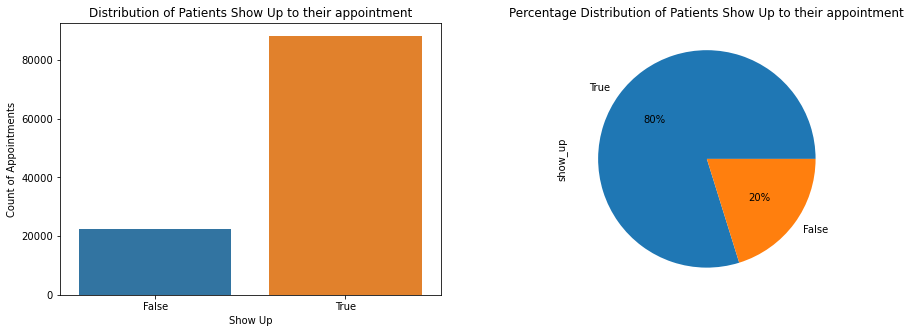

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
catplot(df, 'show_up', 'Show Up', 'Count of Appointments', 'Distribution of Patients Show Up to their appointment')

plt.subplot(1,2,2)
df.show_up.value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Percentage Distribution of Patients Show Up to their appointment')
plt.show()

The pie chart plotted reveals that 80% of patients show up for their appointment and 20% of patients do not show up for their appointment. In order to answer the question, let's see the count distribution of male and female patients in the dataset.

In [52]:
gendercount = df['gender'].value_counts()
gendercount

F    71836
M    38685
Name: gender, dtype: int64

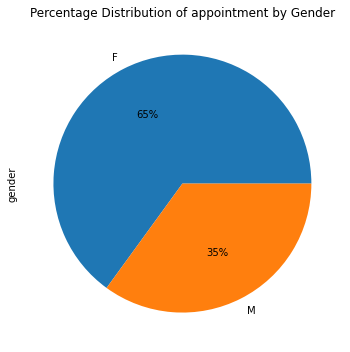

In [53]:
# creating a pie chart to show the percentage distribution of patients by gender
gendercount.plot(kind='pie', figsize=(5,5), autopct='%1.0f%%', title='Percentage Distribution of appointment by Gender')
plt.tight_layout()

The above value count and pie chart reveals that there are 71,836 women and 38,685 men in the dataset. Women make up 65% of the patients with appointments. Could this mean that women have more appointments because they pay more attention to their health or that women face more health issues compared to men? Further analysis with other variables in the dataset will help with answers. But first, let's explore the relationship between gender and showed_up to get further insights.

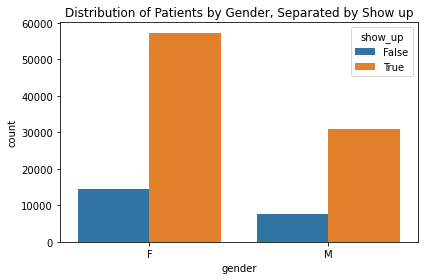

In [54]:
#exploring relationship between gender and show up
sns.countplot(x='gender', data=df, hue='show_up').set(title='Distribution of Patients by Gender, Separated by Show up')
plt.tight_layout()

In [55]:
show_proportionsbygender = df.groupby(['gender', 'show_up']).count()['age']
show_proportionsbygender

gender  show_up
F       False      14591
        True       57245
M       False       7723
        True       30962
Name: age, dtype: int64

57,245 of the 71,836 female patients with appointments show up for their appointment. 30,962 of the 38,685 male patients with appointments show up to their appointment. However, plotting counts does not help with accurate representation of the genders show up because there are more female patients than male patients in the dataset so I'll use frequencies of both

In [56]:
female_showproportions = show_proportionsbygender['F'] / gendercount['F']
female_showproportions

show_up
False    0.203115
True     0.796885
Name: age, dtype: float64

In [57]:
male_showproportions = show_proportionsbygender['M'] / gendercount['M']
male_showproportions

show_up
False    0.199638
True     0.800362
Name: age, dtype: float64

In [58]:
# barplot function
def barplot(xdata, ydata, gxlabel, gylabel, gtitle, gerrwidth=None, gpalette=None):
    g = sns.barplot(x = xdata, y = ydata, errwidth = gerrwidth, palette = gpalette)
    g.set(xlabel = gxlabel, ylabel = gylabel, title = gtitle)
    return g

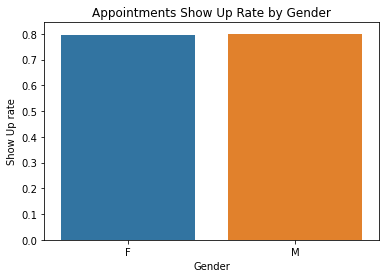

In [59]:
barplot(df['gender'], df['show_up'], 'Gender', 'Show Up rate', 'Appointments Show Up Rate by Gender', 0)
plt.show()

There is no large difference in show up proportion between male and female patients

exploring with other variables to find out why women have more appointments than men do.

<AxesSubplot:xlabel='sms_received', ylabel='show_up'>

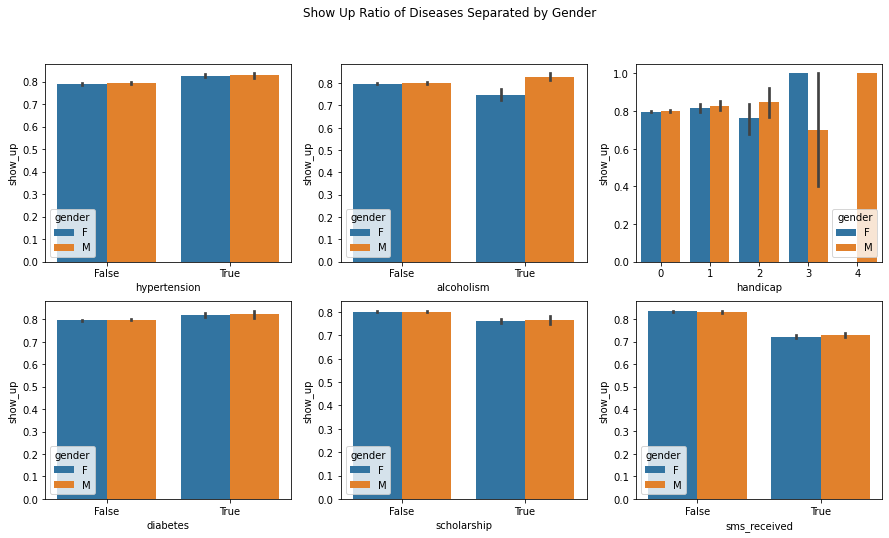

In [64]:
plt.figure(figsize = [15, 8])
plt.suptitle('Show Up Ratio of Diseases Separated by Gender')

plt.subplot(2, 3, 1)
sns.barplot(data=df, x='hypertension', y='show_up', hue='gender')

plt.subplot(2, 3, 2)
sns.barplot(data=df, x='alcoholism', y='show_up', hue='gender')

plt.subplot(2, 3, 3)
sns.barplot(data=df, x='handicap', y='show_up', hue='gender')

plt.subplot(2, 3, 4)
sns.barplot(data=df, x='diabetes', y='show_up', hue='gender')

plt.subplot(2, 3, 5)
sns.barplot(data=df, x='scholarship', y='show_up', hue='gender')

plt.subplot(2, 3, 6)
sns.barplot(data=df, x='sms_received', y='show_up', hue='gender')

Summary: Although most ratios are within close range for both genders, there is a significant difference between the genders for alcoholism and handicap.
- Alcoholism - More men have alcoholism compared to women.
- Handicap - There are more male patients with 3 and 4 handicaps than female.

The total number of female patients along with their show up ratio point to the conclusion that women take better care of their health compared to men. However, it's important to note that other results point to the conclusion that alcoholism and having more handicaps are possible limitations to number of male appointments. 

<a id='how'></a>
### Research Question 2: How does hypertension affect  the chances of a patient showing up for their appointments?

In [68]:
#value count for hipertension column to indicate whether patients have hypertension or not
df['hypertension'].value_counts()

False    88720
True     21801
Name: hypertension, dtype: int64

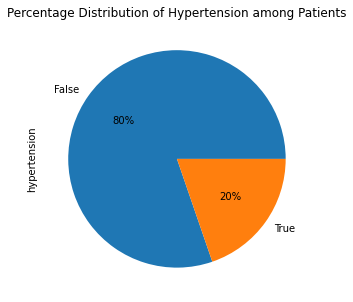

In [69]:
# creating a pie chart to show the distribution of patients
df.hypertension.value_counts().plot(kind='pie',figsize=(5,5),autopct='%1.0f%%')
plt.title('Percentage Distribution of Hypertension among Patients')
plt.show()

Of the total number of patients, 21,801 have hypertension and 88,725 patients do not have hypertension. Only 20% of patients have hypertension while 80% of patients do not have hypertension. Let's plot visuals to uncover how having hypertension affects the chances of a patient showing up to their appointment.

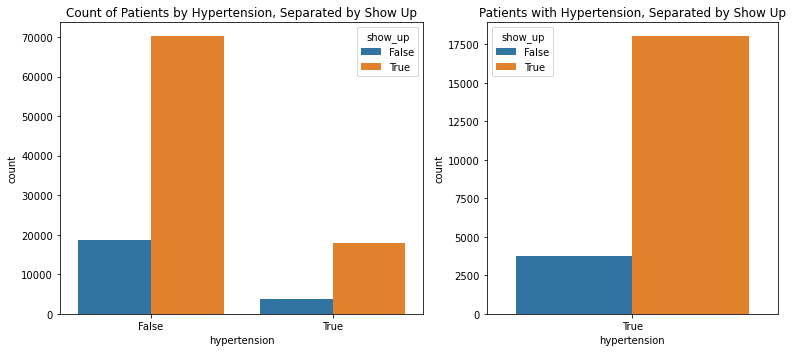

In [70]:
f, axs = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw=dict(width_ratios=[5, 4]))
sns.countplot(x='hypertension', data=df, hue='show_up', ax=axs[0]).set(title='Count of Patients by Hypertension, Separated by Show Up')
df_a = df.loc[df['hypertension'] == True]
sns.countplot(x='hypertension', data=df_a, hue='show_up', ax=axs[1]).set(title='Patients with Hypertension, Separated by Show Up')
plt.tight_layout()

In [72]:
show_proportionsbygende = df.groupby(['hypertension', 'show_up']).count()['age']
show_proportionsbygende

hypertension  show_up
False         False      18542
              True       70178
True          False       3772
              True       18029
Name: age, dtype: int64

The charts have revealed that of the 21,801 patients with hypertension, 18,029 show up for their appointments and about 3,772 hypertensive patients do not show up to their appointment. It can therefore be concluded that having hypertension causes patients to be more inclined to show up for their appointments.

<a id='is'></a>
### Research Question 3: Is age a factor that causes patients to show up more for their appointments?

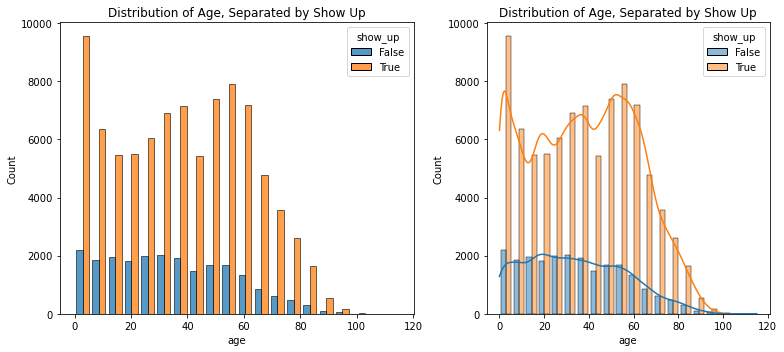

In [73]:
f, axs = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw=dict(width_ratios=[5, 4]))
sns.histplot(data=df, x='age', hue='show_up', bins=20, multiple='dodge', shrink=.8, ax=axs[0]).set(title='Distribution of Age, Separated by Show Up')
sns.histplot(data=df, x='age', hue='show_up', bins=20, multiple='dodge', shrink=.8, kde=True, ax=axs[1]).set(title='Distribution of Age, Separated by Show Up')
plt.tight_layout()

Patients between the ages of 0-1 have the highest number of appointments and show ups, which could be due to mandatory medical visits and checkups. After these ages though, there are fluctuating declines and increase in show up among patients, until a sharp rise in show up between ages 45 - 60. No show decreases with age.

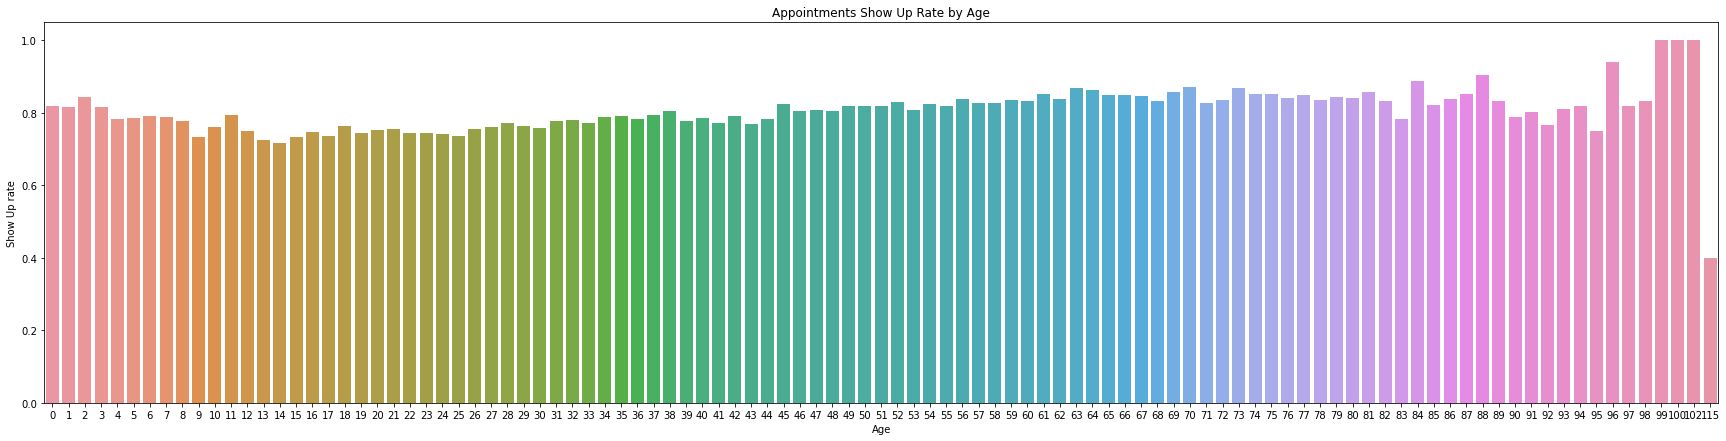

In [74]:
plt.figure(figsize=(30,7))
barplot(df['age'], df['show_up'], 'Age', 'Show Up rate', 'Appointments Show Up Rate by Age', 0)
plt.show()

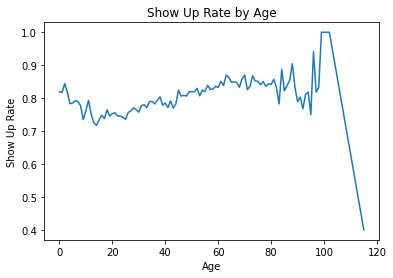

In [75]:
y_mean = df['show_up'].groupby(df['age']).mean()
x_age = df['age'].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_mean)
plt.title('Show Up Rate by Age')
plt.xlabel('Age')
plt.ylabel('Show Up Rate')
plt.show()

Age is a factor that causes patients to show up for their appointments as babies and elderly patients show up most for their appointments. These groups are usually more vulnerable and require frequent medical care.

<a id='what'></a>
### Research Question 4: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Analysis of some of the other variables in the dataset

In [81]:
# seggregating variables into groups
factors = ['scholarship', 'sms_received','month', 'weekday', 'hypertension', 'diabetes', 'alcoholism', 'handicap']

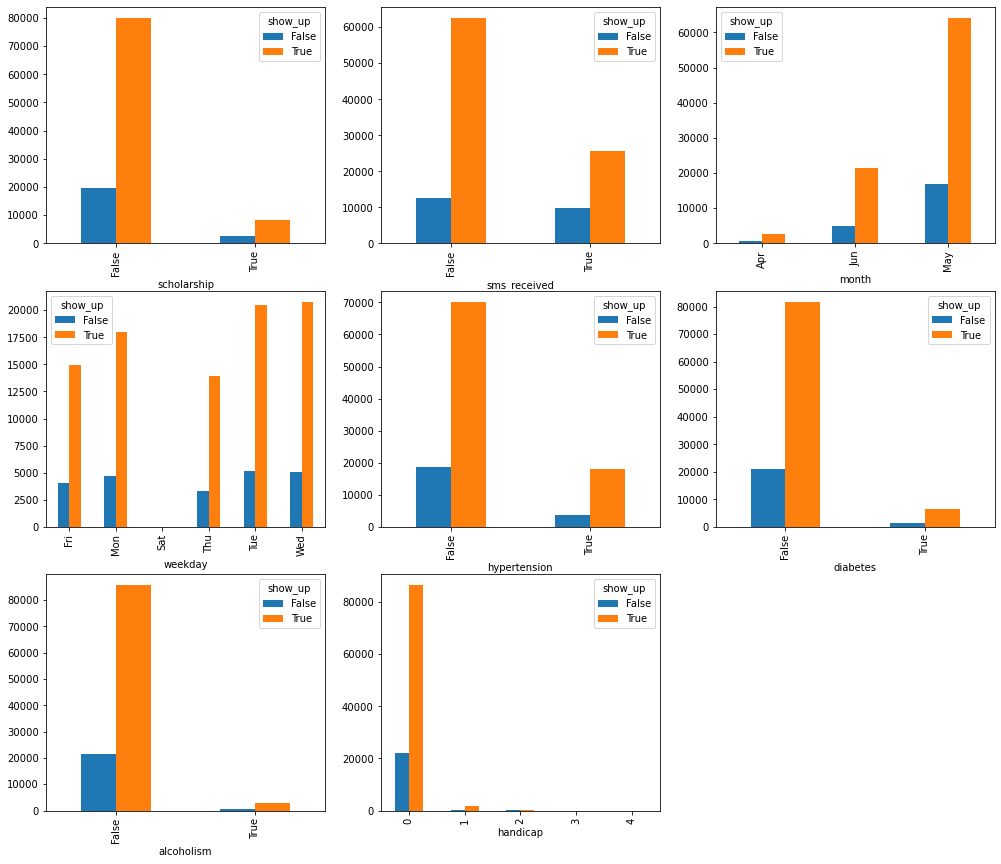

In [82]:
fig = plt.figure(figsize=(17, 20))
for i, var in enumerate(factors):
    ax = fig.add_subplot(4, 3, i+1)
    df.groupby([var, 'show_up'])[var].count().unstack('show_up').plot(ax=ax, kind='bar')

#### Summary

- scholarship: 
Near 80,000 patients without scholarship showed up to their appointment. Less than 10,000 of patients with scholarship showed up for their appointment. 

- sms_received:
Above 60,000 patients who showed up to their appointments were those who did not receive sms before their appointment. Only about 28,000 patients who received sms showed up for their appointment. 

- Month:
The data covered appointments from April, May, and June. May has the most appointments and show ups of the three months, over 60,000 patients showed up for their appointments in May alone. 

- Weekday:
Between Monday to Friday, Wednesdays have the most patient show ups to appointments, followed closely by Tuesdays.

- Hypertension: 
About 70,000 patients that do not have hypertension showed up for their appointments. About 18,000 patients have hypertension and still show up to their appointment.

- Diabetes, alcoholism, handicap:
Majority of patients who showed up to their appointments were those who do not have any of these illnesses. The patients that do have them have more show ups than no shows so they are likely important factors that help predict if a patient will show up to their appointment.

###### Insights:
Factors that are important to know in order to predict if a patient will show up for their appointment

- Month: Appointments in May are more likely to have patient show ups.
- Day of the week: If appointment falls on a Wednesday or Tuesday, the patient will most likely show up.
- Hypertension
- Diabetes
- Alcoholism
- Handicap

It is impressive that majority of patients with alcoholism show up for their appointment regardless of their addiction.

<a id='conclusions'></a>
## Conclusions

The following tentative conclusions were drawn:

Women take better care of their health when compared to men. Men suffering more from alcoholism and having more handicaps point out possible reasons why there are more female appointments than male ones in the dataset. Both male and female patients show up to their appointments more than those that didnt.

Having hypertension causes patients to show up for their appointments because the patients are more inclined to take care of their health and need more frequent checkups from their healthcare providers. Of all the illnesses in the data, Hypertension is the highest occurring in patients who show up for their appointment.

Age is a factor that causes patients to show up for their appointments. Babies and elderly patients, two groups that are mostly vulnerable and require frequent medical care, show up most for their appointments. No show up to appointment decreases with age.

The factors that are important for one to know in order to predict if a patient will show up for their scheduled appointment include Month, Day of the week, Hypertension, Diabetes, Alcoholism, Handicap, and Age.

Having a scholarship and receiving SMS does not have an impact on patients show up to appointments

<a id='limitations'></a>
## Limitations

There were 110,527 samples in the raw dataset, 110,521 were used for the analysis. 

Encoding of the No-show column said ‘No’ if the patient showed up to their appointment and ‘Yes’ if they did not show up, it had be changed to say 'Yes' if the patient showed up to their appointment, and 'No' if they did not show up for easier readability. The column name was also changed.

Dataset included data from only three months, so it is not an accurate representative of the population and doesnt help with answering certain questions like why May has such huge numbers for appointments and show ups compared to the other two months.

The age column had an invalid sample that had to be removed because it might have affected accuracy of results.

There were duplicated patientids which revealed that some patients had more than 1 appointment, these were dropped. 

There were 5 invalid rows in the dataset where scheduledday was set after appointmentdate. These rows are considered invalid because the day of registering an appointment is usually before, not after the day of the actual appointment.